In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv('ILI_ENGLAND.csv')
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data=pd.read_csv('ILI_ENGLAND.csv',parse_dates=['Week'],index_col=0,date_parser=dateparse)

In [3]:
feature = pd.read_csv('select features.csv')

In [4]:
size = int(len(data))
year = 52

L5=data.index[size - year:size]
L4=data.index[size - year*2:size - year]
L3=data.index[size - year*3:size - year*2]
L2=data.index[size - year*4:size - year*3]
L1=data.index[size - year*5:size - year*4]
L=data.index[size - year*6:size - year*5]

feature

In [5]:

features = ['flu','flu contagious','flu remedies','lemsip','flu complications','flu recovery','Influenza A virus',
            'flu duration','flu fever','influenza','cold flu','flu signs','cold relief','cold','is flu contagious',
            'flu uk','cough','flu duration','flu contagious period','flu injection','flu virus','flu in uk',
            'flu cure','flu in children','flu pregnancy','flu headache','flu infection','flu virus symptoms',
            'flu in pregnancy','flu outbreak','flu and pregnant']

feature = feature[features]

train test

In [6]:

df_train5 = feature[0:size - year]
data_train5 = data[0:size - year]
df_test5 = feature[size - year:size]
data_test5 = data[size - year:size]


x_train5 = df_train5[:]
y_train5 = data_train5.ILI_rate
x_test5 = df_test5[:]
y_test5 = data_test5.ILI_rate

In [7]:
df_train4 = feature[0:size - year*2]
data_train4 = data[0:size - year*2]
df_test4 = feature[size - year*2:size - year]
data_test4 = data[size - year*2:size - year]


x_train4 = df_train4[:]
y_train4 = data_train4.ILI_rate
x_test4 = df_test4[:]
y_test4 = data_test4.ILI_rate

In [8]:
df_train3 = feature[0:size - year*3]
data_train3 = data[0:size - year*3]
df_test3 = feature[size - year*3:size - year*2]
data_test3 = data[size - year*3:size - year*2]


x_train3 = df_train3[:]
y_train3 = data_train3.ILI_rate
x_test3 = df_test3[:]
y_test3 = data_test3.ILI_rate

In [9]:
df_train2 = feature[0:size - year*4]
data_train2 = data[0:size - year*4]
df_test2 = feature[size - year*4:size - year*3]
data_test2 = data[size - year*4:size - year*3]


x_train2 = df_train2[:]
y_train2 = data_train2.ILI_rate
x_test2 = df_test2[:]
y_test2 = data_test2.ILI_rate

In [10]:
df_train1 = feature[0:size - year*5]
data_train1 = data[0:size - year*5]
df_test1 = feature[size - year*5:size - year*4]
data_test1 = data[size - year*5:size - year*4]


x_train1 = df_train1[:]
y_train1 = data_train1.ILI_rate
x_test1 = df_test1[:]
y_test1 = data_test1.ILI_rate

least squares regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

RMSE of lr : 8.7532
mae of lr: 2.4273
r2 of lr: 0.8543


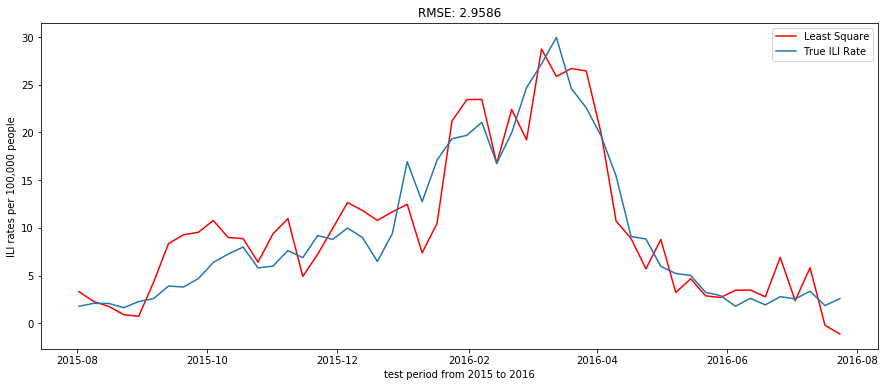

In [17]:
lr5 = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=10)
lr5.fit(x_train5, y_train5)
predict_y5 = lr5.predict(x_test5)

df5 = pd.DataFrame(data=predict_y5, index=L5,columns=["predicted rate"])

line_up5, = plt.plot(df5, label='Least Square',color='red')
line_down5, = plt.plot(data_test5, label='True ILI Rate')
plt.legend(handles=[line_up5, line_down5])
plt.ylabel('ILI rates per 100,000 people')
plt.xlabel('test period from 2015 to 2016')
plt.title('RMSE: %.4f'% np.sqrt(sum((predict_y5-y_test5)**2)/len(y_test5)))

print ('RMSE of lr : %.4f'% mean_squared_error(predict_y5,y_test5))
print ('mae of lr: %.4f'% mean_absolute_error(predict_y5,y_test5))
print ('r2 of lr: %.4f'% r2_score(predict_y5,y_test5))

plt.figure(figsize=(8,5))




RMSE of lr : 115.8350
mae of lr: 7.9729
r2 of lr: 0.1698


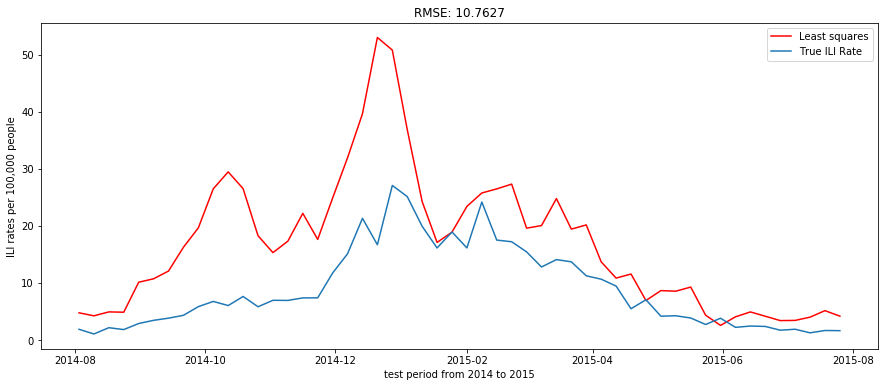

In [13]:
lr4 = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=10)
lr4.fit(x_train4, y_train4)
predict_y4 = lr4.predict(x_test4)

df4 = pd.DataFrame(data=predict_y4, index=L4,columns=["predicted rate"])

line_up4, = plt.plot(df4, label='Least squares',color='red')
line_down4, = plt.plot(data_test4, label='True ILI Rate')
plt.legend(handles=[line_up4, line_down4])
plt.ylabel('ILI rates per 100,000 people')
plt.xlabel('test period from 2014 to 2015')
#plt.ylim((0, 30))
plt.title('RMSE: %.4f'% np.sqrt(sum((predict_y4-y_test4)**2)/len(y_test4)))
print ('RMSE of lr : %.4f'% mean_squared_error(predict_y4,y_test4))
print ('mae of lr: %.4f'% mean_absolute_error(predict_y4,y_test4))
print ('r2 of lr: %.4f'% r2_score(predict_y4,y_test4))
plt.figure(figsize=(8,5))
plt.show()

RMSE of lr : 93.6197
mae of lr: 8.7100
r2 of lr: -1.1447


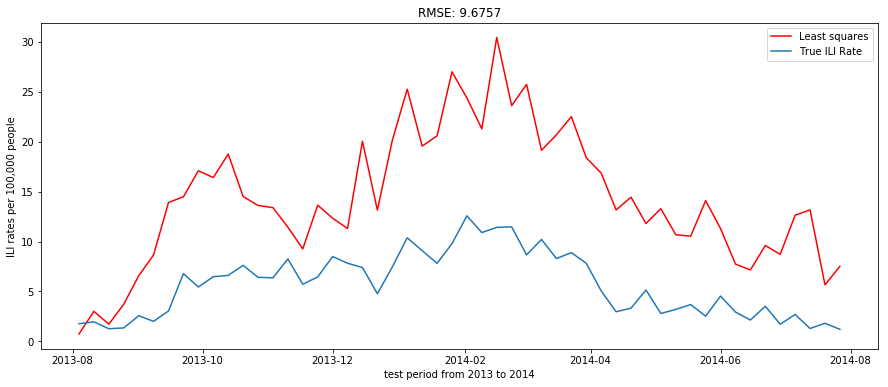

In [14]:
lr3 = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=10)
lr3.fit(x_train3, y_train3)
predict_y3 = lr3.predict(x_test3)

df3 = pd.DataFrame(data=predict_y3, index=L3,columns=["predicted rate"])

line_up3, = plt.plot(df3, label='Least squares',color='red')
line_down3, = plt.plot(data_test3, label='True ILI Rate')
plt.legend(handles=[line_up3, line_down3])
plt.ylabel('ILI rates per 100,000 people')
plt.xlabel('test period from 2013 to 2014')
#plt.ylim((0, 30))
plt.title('RMSE: %.4f'% np.sqrt(sum((predict_y3-y_test3)**2)/len(y_test3)))
print ('RMSE of lr : %.4f'% mean_squared_error(predict_y3,y_test3))
print ('mae of lr: %.4f'% mean_absolute_error(predict_y3,y_test3))
print ('r2 of lr: %.4f'% r2_score(predict_y3,y_test3))
plt.figure(figsize=(8,5))



RMSE of lr : 37.7995
mae of lr: 4.4560
r2 of lr: 0.6357


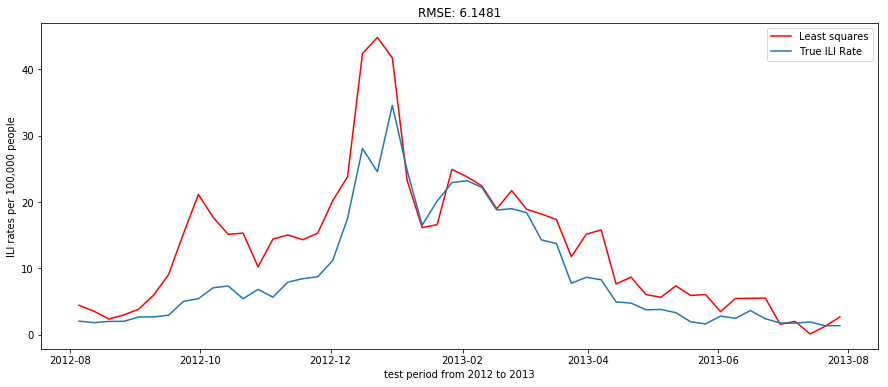

In [15]:
lr2 = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=10)
lr2.fit(x_train2, y_train2)
predict_y2 = lr2.predict(x_test2)

df2 = pd.DataFrame(data=predict_y2, index=L2,columns=["predicted rate"])

line_up2, = plt.plot(df2, label='Least squares',color='red')
line_down2, = plt.plot(data_test2, label='True ILI Rate')
plt.legend(handles=[line_up2, line_down2])
plt.ylabel('ILI rates per 100,000 people')
plt.xlabel('test period from 2012 to 2013')

plt.title('RMSE: %.4f'% np.sqrt(sum((predict_y2-y_test2)**2)/len(y_test2)))
print ('RMSE of lr : %.4f'% mean_squared_error(predict_y2,y_test2))
print ('mae of lr: %.4f'% mean_absolute_error(predict_y2,y_test2))
print ('r2 of lr: %.4f'% r2_score(predict_y2,y_test2))